In [1]:
import pandas as pd
df =pd.read_csv("D:/python test/aug23/dt_reg.csv")
df.head()

,x,y
0,1.852278,143.450823
1,0.473592,54.639848
2,-1.230864,-84.442236
3,0.625667,59.326531
4,-0.072010,-8.244156


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv("D:/python test/aug23/dt_reg.csv")
print(df.head())

X = df[['x']]
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

for depth in [2, 5, None]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Depth = {depth}, RMSE = {rmse:.4f}")


          x           y
0  1.852278  143.450823
1  0.473592   54.639848
2 -1.230864  -84.442236
3  0.625667   59.326531
4 -0.072010   -8.244156
Depth = 2, RMSE = 40.5342
Depth = 5, RMSE = 19.9111
Depth = None, RMSE = 23.7960


In [5]:
import pandas as pd
df = pd.read_csv("D:/python test/aug23/svm_linear.csv")
df.head()

,feature1,feature2,label
0,0.127071,1.013042,1
1,2.312935,3.770534,1
2,3.340428,3.420996,1
3,3.294548,0.595620,1
4,1.944105,1.477241,1


   feature1  feature2  label
0  0.127071  1.013042      1
1  2.312935  3.770534      1
2  3.340428  3.420996      1
3  3.294548  0.595620      1
4  1.944105  1.477241      1
Accuracy: 0.975


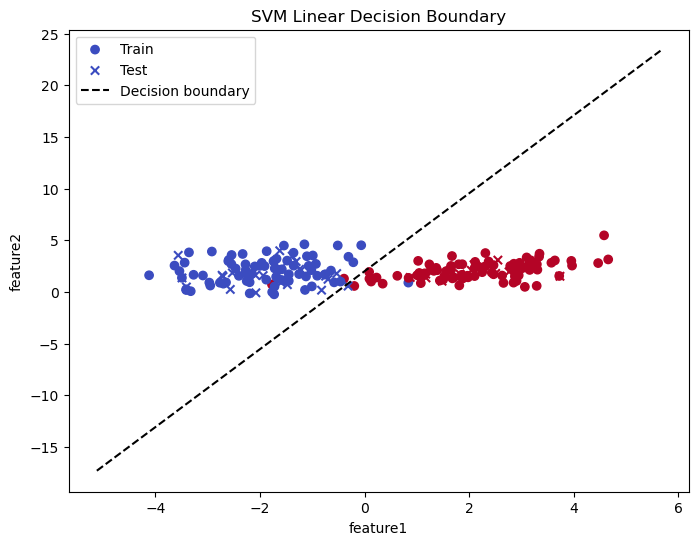

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


df = pd.read_csv("D:/python test/aug23/svm_linear.csv")
print(df.head())


X = df[['feature1', 'feature2']]
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model=SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)



w = model.coef_[0]      
b = model.intercept_[0] 

x1_min, x1_max = X['feature1'].min() - 1, X['feature1'].max() + 1
x2_min, x2_max = X['feature2'].min() - 1, X['feature2'].max() + 1

xx1 = np.linspace(x1_min, x1_max, 100)
xx2 = -(w[0] * xx1 + b) / w[1]

plt.figure(figsize=(8, 6))
plt.scatter(X_train['feature1'], X_train['feature2'], c=y_train, cmap='coolwarm', marker='o', label='Train')
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Test')


plt.plot(xx1, xx2, 'k--', label='Decision boundary')

plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend()
plt.title("SVM Linear Decision Boundary")
plt.show()
